In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as rng
from scipy.io import arff

In [7]:
data = arff.loadarff('steel-plates-fault.arff')
df = pd.DataFrame(data[0])
da = df.to_numpy()

x = da[:, :-1]
y = da[:, -1]

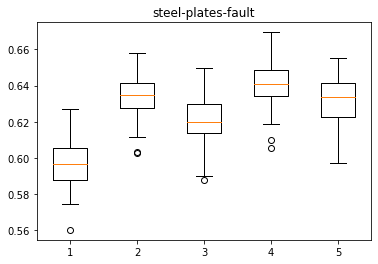

In [9]:
from matplotlib import pyplot as plt
from numpy import average
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

steelplate_accuracy_list=[]
neighbor_value = [1,2,3,4,5]

for n in neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.5, random_state=i)

        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        
        
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)     
        pre_y = knn.predict(X_test)

        steelplate_accuracy = accuracy_score(y_test, pre_y)
        steelplate_accuracy_list.append(steelplate_accuracy)


steelplate_accuracy_final = pd.DataFrame( { '1': steelplate_accuracy_list[0:50], 
                                            '2': steelplate_accuracy_list[50:100], 
                                            '3': steelplate_accuracy_list[100:150], 
                                            '4': steelplate_accuracy_list[150:200], 
                                            '5': steelplate_accuracy_list[200:250] } )

plt.title("steel-plates-fault") 
plt.boxplot(steelplate_accuracy_final)
plt.show()
    